In [1]:
import cv2
import common
import billboard_identifier
import billboard_replacement

from imageio import imwrite as imsave
from pathlib import Path
import ntpath

In [2]:
data = billboard_identifier.read_data("../../resources/billboard_images.json")
source_images,\
label_images = billboard_identifier.get_billboards_from_data(
    data,
    score_pred=lambda x: x>100
)

print(len(source_images))
print(len(label_images))

2329
2329


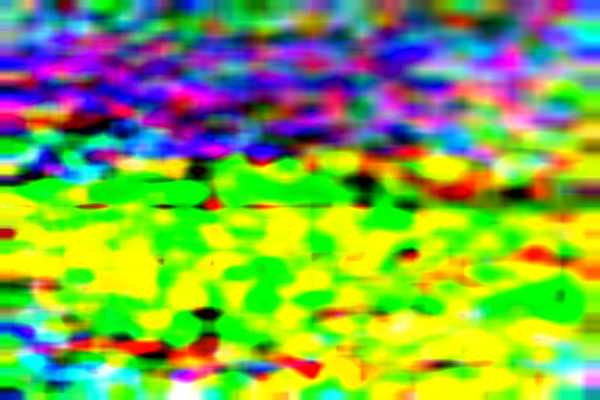

In [3]:
decal_image = cv2.imread("../../resources/new/decal_0.png")
common.display_image(decal_image)

In [9]:
Path("../../out/replaced/").mkdir(parents=True, exist_ok=True)
count = 20
failures = 0
for source_image_path, label_image_path in zip(source_images[:count], label_images[:count]):
    try:
        source_image = cv2.imread(source_image_path)
        label_image = cv2.imread(label_image_path)
        output_image = billboard_replacement.apply_image_to_billboard(
            source_image,
            label_image,
            decal_image
        )[0]
        output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
        output_filename = ntpath.basename(source_image_path)
        imsave(f"../../out/replaced/{output_filename}", output_image, format="jpg")
    except Exception as e:
        failures += 1
        print(f"Failed to generate for image {source_image_path}")
        print(e)
print(f"{count-failures}/{count} images generated successfully.")

Failed to generate for image E:\research\Datasets\playing-for-benchmarks\train_img_00-77_0_jpg\train\img\001\001_00220.jpg
OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\calib3d\src\fundam.cpp:380: error: (-215:Assertion failed) src.checkVector(2) == dst.checkVector(2) in function 'cv::findHomography'

Failed to generate for image E:\research\Datasets\playing-for-benchmarks\train_img_00-77_0_jpg\train\img\001\001_00230.jpg
OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\calib3d\src\fundam.cpp:380: error: (-215:Assertion failed) src.checkVector(2) == dst.checkVector(2) in function 'cv::findHomography'

Failed to generate for image E:\research\Datasets\playing-for-benchmarks\train_img_00-77_0_jpg\train\img\001\001_00240.jpg
OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\calib3d\src\fundam.cpp:380: error: (-215:Assertion failed) src.checkVector(2) == dst.check